<a href="https://colab.research.google.com/github/hargurjeet/DeepLearning/blob/main/CNN_Model_Age_Gender_Ethnicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ethnicity Predicition Using TensorFlow- Kaggle Age, Gender and Ethnicity Dataset**

It is an open source artificial intelligence library, using data flow graphs to build models. It allows developers to create large-scale neural networks with many layers. TensorFlow is mainly used for: Classification, Perception, Understanding, Discovering, Prediction and Creation.

Today I build a classifer using TensorFlow that predicts the ethinicy of a given image.

# **Table Of Contents**<a name="top"></a>


---



---


  1. [About the Dataset](#1)
  2. [Loading the dataset Preprocessing](#2)
  3. [Building Neural network using Tensorflow](#3)
  4. [Analysing Results](#4)
  5. [Hyper Parameterization](#5)
  6. [Making Predicition on the best parameters](#6)
  7. [Summary](#7)
  8. [Future Work](#8)
  9. [References](#9)

# <font color="white" size=+2.0><b>1: AboutDataset</b></font> <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# <font color="white" size=+2.0><b>2: Loading and Preprocessing the datasets</b></font> <a name="2"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

2.4.1


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hargurjeet","key":"c3882bdbb49388021171402c7018655e"}'}

In [ ]:
! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/nipunarora8/age-gender-and-ethnicity-face-data-csv'
od.download('https://www.kaggle.com/nipunarora8/age-gender-and-ethnicity-face-data-csv')

  8%|▊         | 5.00M/63.2M [00:00<00:02, 27.2MB/s]

100%|██████████| 63.2M/63.2M [00:00<00:00, 77.6MB/s]


In [ ]:
df = pd.read_csv('/content/age-gender-and-ethnicity-face-data-csv/age_gender.csv')

df.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


In [ ]:
df[df.isnull().any(axis=1)]

,age,ethnicity,gender,img_name,pixels


In [ ]:
df.shape

(23705, 5)

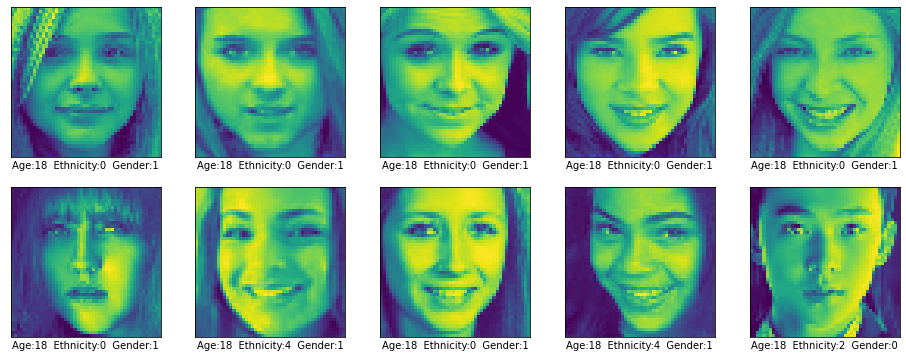

In [ ]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

plt.figure(figsize=(16,16))
for i in range(2500,2510):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[i])+
        "  Gender:"+ str(df['gender'].iloc[i])
    )
plt.show()

# <font color="white" size=+2.0><b>3: Building Neural Network using TensorFlow</b></font> <a name="3"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [ ]:
df.drop('img_name', axis = 1, inplace=True)

X = df.pixels
y_gender = df.gender
y_age = df.age
y_ethnicity = df.ethnicity

In [ ]:
X = np.stack(np.array(X), axis=0)
pictures = np.reshape(X, (-1, 48, 48, 1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(pictures, y_gender, test_size=0.2, random_state=1)

X_train_gender, X_val_gender, y_train_gender, y_val_gender = train_test_split(X_train_gender, y_train_gender, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(pictures, y_age, test_size=0.2, random_state=1)

X_train_age, X_val_age, y_train_age, y_val_age = train_test_split(X_train_age, y_train_age, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(pictures, y_ethnicity, test_size=0.2, random_state=1)

X_train_ethnicity, X_val_ethnicity, y_train_ethnicity, y_val_ethnicity = train_test_split(X_train_ethnicity, y_train_ethnicity, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
# Model for Gender

gender_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
 train_generator = train_datagen.flow(
        X_train_gender, y_train_gender, # This is the source directory for training images
        batch_size=128)
 
 validation_generator = train_datagen.flow(
        X_val_gender, y_val_gender,
        batch_size=64)

In [ ]:
history = gender_model.fit(
      train_generator,
      steps_per_epoch=len(X_train_gender)/ 128,  
      epochs=15,
      validation_data=validation_generator,  
      verbose=2)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
111/111 - 39s - loss: 0.6411 - accuracy: 0.6279 - val_loss: 0.6384 - val_accuracy: 0.6402
Epoch 2/15
111/111 - 6s - loss: 0.6095 - accuracy: 0.6736 - val_loss: 0.6101 - val_accuracy: 0.6697
Epoch 3/15
111/111 - 6s - loss: 0.5999 - accuracy: 0.6775 - val_loss: 0.6038 - val_accuracy: 0.6790
Epoch 4/15
111/111 - 6s - loss: 0.5890 - accuracy: 0.6871 - val_loss: 0.5891 - val_accuracy: 0.6876
Epoch 5/15
111/111 - 6s - loss: 0.5748 - accuracy: 0.7004 - val_loss: 0.5805 - val_accuracy: 0.6971
Epoch 6/15
111/111 - 6s - loss: 0.5617 - accuracy: 0.7109 - val_loss: 0.5677 - val_accuracy: 0.7051
Epoch 7/15
111/111 - 6s - loss: 0.5473 - accuracy: 0.7232 - val_loss: 0.5475 - val_accuracy: 0.7203
Epoch 8/15
111/111 - 6s - loss: 0.5328 - accuracy: 0.7319 - val_loss: 0.5220 - val_accuracy: 0.7463
Epoch 9/15
111/111 - 6s - loss: 0.5159 - accuracy: 0.7496 - val_loss: 0.5098 - val_accuracy: 0.7515
Epoch 10/15
111/111 - 7s - loss: 0.5114 - accuracy: 0.7493 - val_loss: 0.5128 - val_accuracy: 0.748

# <font color="white" size=+2.0><b>4: Analysing Results</b></font> <a name="4"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

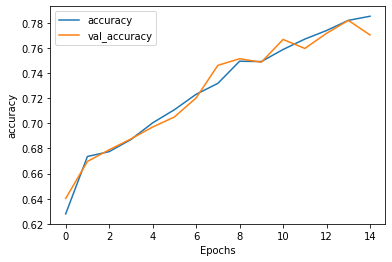

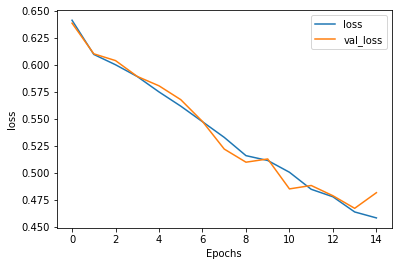

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
gender_model.evaluate(X_test_gender, y_test_gender)

149/149 [==============================] - 1s 3ms/step - loss: 43.5591 - accuracy: 0.7625


[43.55910873413086, 0.7624973654747009]

## Model for predicting ethnicity

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    brightness_range=[0.8,1.2],
    zoom_range=0.2,
    shear_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
# Model for Ethnicity

ethnicity_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(8, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax'),
])
ethnicity_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ethnicity_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 64)         

In [ ]:
train_generator = train_datagen.flow(
        X_train_ethnicity, y_train_ethnicity, 
        batch_size=128)
 
validation_generator = train_datagen.flow(
        X_val_ethnicity, y_val_ethnicity,
        batch_size=64)
 
history = ethnicity_model.fit(
      train_generator,
      steps_per_epoch=len(X_train_ethnicity)/128,  
      epochs=15,
      validation_data=validation_generator,  
      verbose=2)


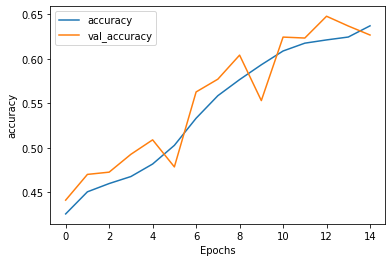

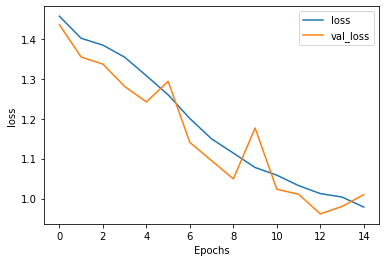

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
ethnicity_model.evaluate(X_test_ethnicity, y_test_ethnicity)

149/149 [==============================] - 1s 4ms/step - loss: 42.5803 - accuracy: 0.6201


[42.58026885986328, 0.6201223134994507]

Predicting the Age

In [ ]:
# Model for Age

age_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1),
])
age_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

age_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 21, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)             

In [ ]:
age_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(96, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(160, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1),
])

from tensorflow.keras.optimizers import Adam

age_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

age_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 46, 46, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 44, 44, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 18, 18, 96)        55392     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 9, 9, 96)         

In [ ]:
history = age_model.fit(
      X_train_age, y_train_age, 
      epochs=7,
      validation_split=0.2,
      batch_size=64)

Epoch 1/7
178/178 [==============================] - 3s 14ms/step - loss: 512.3728 - accuracy: 0.0403 - val_loss: 1169.3658 - val_accuracy: 0.0060
Epoch 2/7
178/178 [==============================] - 2s 11ms/step - loss: 200.8078 - accuracy: 0.0323 - val_loss: 160.6070 - val_accuracy: 0.0309
Epoch 3/7
178/178 [==============================] - 2s 11ms/step - loss: 167.9170 - accuracy: 0.0304 - val_loss: 135.9285 - val_accuracy: 0.0348
Epoch 4/7
178/178 [==============================] - 2s 11ms/step - loss: 130.6567 - accuracy: 0.0307 - val_loss: 119.7313 - val_accuracy: 0.0334
Epoch 5/7
178/178 [==============================] - 2s 12ms/step - loss: 114.2829 - accuracy: 0.0275 - val_loss: 215.7274 - val_accuracy: 0.0390
Epoch 6/7
178/178 [==============================] - 2s 11ms/step - loss: 105.8291 - accuracy: 0.0282 - val_loss: 146.4186 - val_accuracy: 0.0112
Epoch 7/7
178/178 [==============================] - 2s 11ms/step - loss: 97.3122 - accuracy: 0.0315 - val_loss: 98.3117 - 

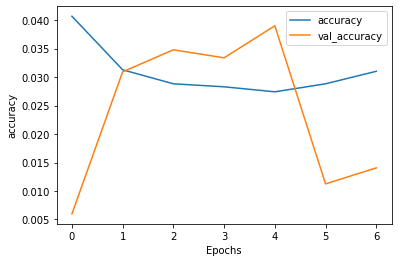

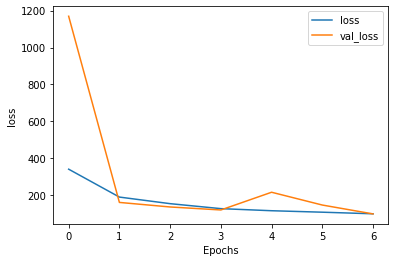

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
age_model.evaluate(X_test_age, y_test_age)

149/149 [==============================] - 1s 4ms/step - loss: 95.0260 - accuracy: 0.0105


[95.02596282958984, 0.010546298697590828]

In [ ]:
print ('Actual Values:', y_test_age[:10])
print()
y_age_pred = age_model.predict(X_test_age[:10])
print ('Predicted Values:', y_age_pred)

Actual Values: 10851    30
966       1
14158    36
8576     27
21066    63
11590    31
7377     26
4339     23
3016      2
11439    30
Name: age, dtype: int64

Predicted Values: [[22.74988  ]
 [-5.4867435]
 [33.611603 ]
 [39.149673 ]
 [83.92642  ]
 [33.581646 ]
 [25.777945 ]
 [30.454878 ]
 [-5.481271 ]
 [30.173866 ]]


# <font color="white" size=+2.0><b>5: Hyper Parameterization</b></font> <a name="5"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [ ]:
## Optimizing the best parameters

import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd', 'rmsprop']))

METRIC_ACCURACY = 'accuracy'

# hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER]
# metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')]

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():

  hp.hparams_config(
      hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
      metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
# Model for Ethnicity
def train_test_model(hparams):
  ethnicity_model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation='relu'),
      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
      # tf.keras.layers.Dense(8, activation='relu'),
      # tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(5, activation='softmax'),
  ])
  ethnicity_model.compile(optimizer=hparams[HP_OPTIMIZER], loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  
  ethnicity_model.fit(train_generator,
                      steps_per_epoch=len(X_train_ethnicity)/128,  
                      epochs=15,
                      validation_data=validation_generator,  
                      verbose=2)
  
  _, accuracy = ethnicity_model.evaluate(X_test_ethnicity, y_test_ethnicity)

  return accuracy


In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 16, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/15
111/111 - 15s - loss: 1.4383 - accuracy: 0.4320 - val_loss: 1.3643 - val_accuracy: 0.4740
Epoch 2/15
111/111 - 14s - loss: 1.3823 - accuracy: 0.4597 - val_loss: 1.3555 - val_accuracy: 0.4708
Epoch 3/15
111/111 - 14s - loss: 1.3608 - accuracy: 0.4643 - val_loss: 1.3177 - val_accuracy: 0.4843
Epoch 4/15
111/111 - 14s - loss: 1.3362 - accuracy: 0.4730 - val_loss: 1.2778 - val_accuracy: 0.4917
Epoch 5/15
111/111 - 14s - loss: 1.2955 - accuracy: 0.4884 - val_loss: 1.2891 - val_accuracy: 0.5079
Epoch 6/15
111/111 - 14s - loss: 1.2571 - accuracy: 0.5058 - val_loss: 1.1730 - val_accuracy: 0.5391
Epoch 7/15
111/111 - 14s - loss: 1.2129 - accuracy: 0.5279 - val_loss: 1.2400 - val_accuracy: 0.5035
Epoch 8/15
111/111 - 14s - loss: 1.1720 - accuracy: 0.5493 - val_loss: 1.1873 - val_accuracy: 0.5402
Epoch 9/15
111/111 - 14s - loss: 1.1318 - accuracy: 0.5686 - val_loss: 1.1101 - val_accuracy: 0.5729
Epoch 10/1

# <font color="white" size=+2.0><b>6: Making Prediction on the best parameters</b></font> <a name="6"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [ ]:
# Model for Ethnicity

ethnicity_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(8, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax'),
])
ethnicity_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ethnicity_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          7

In [ ]:
train_generator = train_datagen.flow(
        X_train_ethnicity, y_train_ethnicity, 
        batch_size=128)
 
validation_generator = train_datagen.flow(
        X_val_ethnicity, y_val_ethnicity,
        batch_size=64)
 
history = ethnicity_model.fit(
      train_generator,
      steps_per_epoch=len(X_train_ethnicity)/128,  
      epochs=15,
      validation_data=validation_generator,  
      verbose=2)

Epoch 1/15
111/111 - 43s - loss: 1.4386 - accuracy: 0.4380 - val_loss: 1.3746 - val_accuracy: 0.4695
Epoch 2/15
111/111 - 9s - loss: 1.3869 - accuracy: 0.4602 - val_loss: 1.3725 - val_accuracy: 0.4545
Epoch 3/15
111/111 - 9s - loss: 1.3655 - accuracy: 0.4691 - val_loss: 1.3173 - val_accuracy: 0.4856
Epoch 4/15
111/111 - 9s - loss: 1.3393 - accuracy: 0.4792 - val_loss: 1.2854 - val_accuracy: 0.4997
Epoch 5/15
111/111 - 10s - loss: 1.3036 - accuracy: 0.4912 - val_loss: 1.2558 - val_accuracy: 0.5022
Epoch 6/15
111/111 - 9s - loss: 1.2491 - accuracy: 0.5164 - val_loss: 1.1864 - val_accuracy: 0.5412
Epoch 7/15
111/111 - 9s - loss: 1.1916 - accuracy: 0.5413 - val_loss: 1.1407 - val_accuracy: 0.5655
Epoch 8/15
111/111 - 10s - loss: 1.1500 - accuracy: 0.5632 - val_loss: 1.1006 - val_accuracy: 0.5773
Epoch 9/15
111/111 - 10s - loss: 1.1171 - accuracy: 0.5758 - val_loss: 1.0747 - val_accuracy: 0.5999
Epoch 10/15
111/111 - 9s - loss: 1.1078 - accuracy: 0.5855 - val_loss: 1.0469 - val_accuracy: 0.

In [ ]:
ethnicity_model.evaluate(X_test_ethnicity, y_test_ethnicity)

149/149 [==============================] - 1s 4ms/step - loss: 43.5098 - accuracy: 0.6444


[43.50984191894531, 0.6443788409233093]

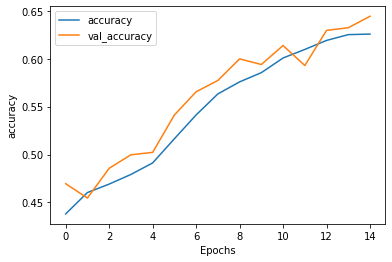

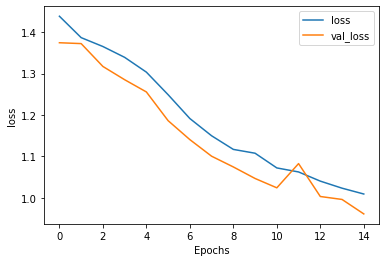

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# <font color="white" size=+2.0><b>7: Summary</b></font> <a name="7"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# <font color="white" size=+2.0><b>8: Future Work</b></font> <a name="8"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# <font color="white" size=+2.0><b>9: Reference</b></font> <a name="9"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 